# **DATA PROJECT 2024: DO INTERENATIONAL WORKERS IN DENMARK REMEDY LABOR SHORTAGE?**

By Emma Knippel, Anna Abildsjov and Oscar Nyholm

# Table of contents
* [Setup](#toc0_)   

* [Read and clean data](#toc1_) 

* [Question 2: Market Clearing Error](#toc2_)    

* [Question 3: Market Clearing Price](#toc3_)    

* [Question 4: A as Price Setter](#toc4_)   

* [Question 5: A as Market Maker](#toc5_) 

* [Question 6: Utalitarian Social Planner](#toc6_) 

* [Question 7: Random Draw](#toc7_) 

* [Question 8: Market Equilibrium](#toc8_) 



## <a id='toc0_'></a>[Setup](#toc0_)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2
import json

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2


In [2]:
# installing API reader, that will allow to load data from DST.
%pip install git+https://github.com/alemartinello/dstapi
%pip install pandas-datareader

import pandas_datareader # install with `pip install pandas-datareader`
from dstapi import DstApi # install with `pip install git+https://github.com/alemartinello/dstapi`

  Cloning https://github.com/alemartinello/dstapi to c:\users\oscar\appdata\local\temp\pip-req-build-2vq4efti
  Resolved https://github.com/alemartinello/dstapi to commit d9eeb5a82cbc70b7d63b2ff44d92632fd77123a4
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/alemartinello/dstapi 'C:\Users\oscar\AppData\Local\Temp\pip-req-build-2vq4efti'


Note: you may need to restart the kernel to use updated packages.


## <a id='toc1_'></a>[Read and clean data](#toc1_)

In [3]:
# importing the actual data from DST
employees = DstApi('LBESK03')
lb_short_service = DstApi('KBS2')
lb_short_manu = DstApi('BARO3')
lb_short_cons = DstApi('KBYG33')
with open('International Labor.json', 'r') as f:
    int_data = json.load(f)
int_lb = pd.DataFrame(int_data)

In [4]:
tabsum = employees.tablesummary(language = 'en')
display(tabsum)
for variable in tabsum['variable name']:
    print(variable+':')
    display(employees.variable_levels(variable, language='en'))

Table LBESK03: Employees by industry (DB07 10- and 19-grouping) and time
Last update: 2024-03-22T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,BRANCHEDB071038,32,TOT,"TOT Industry, total",X,X Activity not stated,False
1,Tid,193,2008M01,2008M01,2024M01,2024M01,True


BRANCHEDB071038:


,id,text
0,TOT,"TOT Industry, total"
1,1,"1 Agriculture, forestry and fishing"
2,A,"A Agriculture, forestry and fishing"
3,2,"2 Manufacturing, mining and quarrying, and uti..."
4,B,B Mining and quarrying
5,C,C Manufacturing
6,D,"D Electricity, gas, steam and air conditioning..."
7,E,"E Water supply, sewerage and waste management"
8,3,3 Construction
9,F,F Construction


Tid:


,id,text
0,2008M01,2008M01
1,2008M02,2008M02
2,2008M03,2008M03
3,2008M04,2008M04
4,2008M05,2008M05
...,...,...
188,2023M09,2023M09
189,2023M10,2023M10
190,2023M11,2023M11
191,2023M12,2023M12


In [5]:
tabsum2 = lb_short_service.tablesummary(language = 'en')
display(tabsum2)
for variable in tabsum2['variable name']:
    print(variable+':')
    display(lb_short_service.variable_levels(variable, language='en'))

Table KBS2: Production limitations in Services by industry (DB07), type and time
Last update: 2024-03-21T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,BRANCHE07,19,000,SERVICES TOTAL,090,Other service activities (94-95),False
1,TYPE,6,INGEN,No limitations,ANDÅS,Other factors,False
2,Tid,155,2011M05,2011M05,2024M03,2024M03,True


BRANCHE07:


,id,text
0,000,SERVICES TOTAL
1,005,TRANSPORT (49-53)
2,010,Land transport and others (49)
3,015,TOURISME (55-56; 79)
4,020,Hotels and similar accommodation (55)
5,025,Restaurants (56)
6,030,Travel agent activities (79)
7,035,COMMUNICATION AND INFORMATION (58; 61-63)
8,040,Information technology service activities (62)
9,045,"FINANCE, INSURANCE AND REAL ESTATE (64-65; 68)"


TYPE:


,id,text
0,INGEN,No limitations
1,MEFT,Insufficient demand
2,MAAK,Shortage of labour force
3,MALOK,Shortage of space and/or equipment
4,FINBR,Financial constraints
5,ANDÅS,Other factors


Tid:


,id,text
0,2011M05,2011M05
1,2011M06,2011M06
2,2011M07,2011M07
3,2011M08,2011M08
4,2011M09,2011M09
...,...,...
150,2023M11,2023M11
151,2023M12,2023M12
152,2024M01,2024M01
153,2024M02,2024M02


In [6]:
tabsum3 = lb_short_manu.tablesummary(language = 'en')
display(tabsum3)
for variable in tabsum3['variable name']:
    print(variable+':')
    display(lb_short_manu.variable_levels(variable, language='en'))

Table BARO3: Production limitations in industry by industry (DB07), type and time
Last update: 2024-01-24T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,BRANCHE07,20,BC,BC Mining and quarrying and manufacturing,S4,Non-durable consumer goods (MIG),False
1,TYPE,6,INGEN,No limitations,ANDÅS,Other factors,False
2,Tid,77,2005K1,2005Q1,2024K1,2024Q1,True


BRANCHE07:


,id,text
0,BC,BC Mining and quarrying and manufacturing
1,B,B Mining and quarrying
2,C,C Manufacturing
3,CA,"CA Manufacture of food products, beverages and..."
4,CB,CB Textiles and leather products
5,CC,CC Wood and paper products and printing
6,CD,CD Oil refinery etc.
7,CE,CE Manufacture of chemicals
8,CF,CF Pharmaceuticals
9,CG,"CG Manufacture of plastic, glass and concrete"


TYPE:


,id,text
0,INGEN,No limitations
1,AMA,Shortage of labour force
2,UKA,Shortage of material and/or equipment
3,UEF,Insufficient demand
4,FINBE,Financial constraints
5,ANDÅS,Other factors


Tid:


,id,text
0,2005K1,2005Q1
1,2005K2,2005Q2
2,2005K3,2005Q3
3,2005K4,2005Q4
4,2006K1,2006Q1
...,...,...
72,2023K1,2023Q1
73,2023K2,2023Q2
74,2023K3,2023Q3
75,2023K4,2023Q4


In [7]:
tabsum4 = lb_short_cons.tablesummary(language = 'en')
display(tabsum4)
for variable in tabsum4['variable name']:
    print(variable+':')
    display(lb_short_cons.variable_levels(variable, language='en'))

Table KBYG33: Production limitations in Construction by industry (DB07), type and time
Last update: 2024-03-21T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,BRANCHE07,9,F,F Construction,43003,43003 Other specialized construction activitie...,False
1,TYPE,7,INGEN,No limitations,ANDÅS,Other factors,False
2,Tid,231,2005M01,2005M01,2024M03,2024M03,True


BRANCHE07:


,id,text
0,F,F Construction
1,41000,41000 Construction of buildings
2,42000,42000 Civil engineering
3,43201,43201 Electrical installation etc.
4,432200,"432200 Plumbing, heat and air-conditioning ins..."
5,43301,43301 Joinery installation etc.
6,43302,43302 Painting and Glazing etc.
7,439910,439910 Bricklayers
8,43003,43003 Other specialized construction activitie...


TYPE:


,id,text
0,INGEN,No limitations
1,MEFT,Insufficient demand
2,DVEJR,Bad weather
3,MAT,Shortage of material and/or equipment
4,AMA,Shortage of labour force
5,FB,Financial contraints
6,ANDÅS,Other factors


Tid:


,id,text
0,2005M01,2005M01
1,2005M02,2005M02
2,2005M03,2005M03
3,2005M04,2005M04
4,2005M05,2005M05
...,...,...
226,2023M11,2023M11
227,2023M12,2023M12
228,2024M01,2024M01
229,2024M02,2024M02


In [8]:
params = employees._define_base_params(language='en')

# For the employment data, we first define our parameters so that we get only data from january 2014 to january 2024.
params = {'table': 'LBESK03',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'BRANCHEDB071038', 'values': ['*']},
  {'code': 'Tid', 'values': ['>2013M12<=2024M01']}]}

# Then, we retract the data we defined, drop the column of industry since we do not need it and rename the columns to english, simple titles.
empl = employees.get_data(params=params)
empl.drop(['BRANCHEDB071038'], axis=1, inplace=True)
empl.rename(columns = {'INDHOLD':'employees', 'TID':'time'}, inplace=True)
empl.head(5)

,time,employees
0,2018M07,42896
1,2018M07,4700
2,2018M07,304551
3,2018M07,10324
4,2018M07,11666


In [25]:
params2 = lb_short_service._define_base_params(language='en')

# For the labor shortaage data, we need to sort through the dataset a bit more when defining out variables:
# We need to specify which industries we want to get data from, since the dataset contains both broad and narrow categories.
#Furhtermore, we want to get data only for the labor shortage and from january 2014 to january 2024.
params2 = {'table': 'KBS2',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'BRANCHE07', 'values': [
     '000',
     '005',
     '015',
     '035',
     '045',
     '060',
     '065',
     '080'
 ]},
  {'code': 'TYPE', 'values': ['MAAK']},
  {'code': 'Tid', 'values': ['>2013M12<=2024M01']}]}

# We retrieve the parameters and sort the data by time and industry.
lab_short_service = lb_short_service.get_data(params=params2)
lab_short_service.sort_values(by = ['TID', 'BRANCHE07'], inplace=True)

# Then, we drop the column 'TYPE', since we only have data for the labor shortage anyways, and this column would otherwise be used to split the data into diffeereeent categories of production limitations.
# We rename the columns to english, simple titles, and the rows to the industry names rather than the industry codes.
# We also drop the old index and reset it.
lab_short_service.drop(['TYPE'], axis = 1, inplace = True)
lab_short_service.rename(columns = {'BRANCHE07':'industry', 'TID':'Time', 'INDHOLD':'Labor Shortage'}, inplace=True)
lab_short_service.reset_index(drop=True, inplace=True)
lab_short_service.head(10)

,industry,Time,Labor Shortage
0,"ARTS, RECREATION AND OTHER SERVICES (90-95)",2014M01,6
1,"CLEANING AND OTHER OPERATIONEL SERVICE (77-78,...",2014M01,13
2,"COMMUNICATION AND INFORMATION (58, 61-63)",2014M01,9
3,"CONSULTANCY, RESEARCH AND OTHERS (69-74)",2014M01,19
4,"FINANCE, INSURANCE AND REAL ESTATE (64-65, 68)",2014M01,0
5,SERVICES TOTAL,2014M01,7
6,"TOURISME (55-56, 79)",2014M01,3
7,TRANSPORT (49-53),2014M01,2
8,"ARTS, RECREATION AND OTHER SERVICES (90-95)",2014M02,2
9,"CLEANING AND OTHER OPERATIONEL SERVICE (77-78,...",2014M02,11


In [10]:
lab_short_service['industry'] = lab_short_service.industry.replace({
    '000':'Total','SERVICES TOTAL':'Total',
    '005':'Transport','TRANSPORT (49-53)':'Transport',
    '015':'Hotels and restaurants','TOURISME (55-56, 79)': 'Hotels and restaurants',
    '035':'Information and communication','COMMUNICATION AND INFORMATION (58, 61-63)':'Information and communication',
    '045':'Finance and real estate','FINANCE, INSURANCE AND REAL ESTATE (64-65, 68)': 'Finance and real estate',
    '060':'Research and consultancy','CONSULTANCY, RESEARCH AND OTHERS (69-74)':'Research and consultancy',
    '065':'Cleaning etc.', 'CLEANING AND OTHER OPERATIONEL SERVICE (77-78, 81-82)':'Cleaning etc.',
    '080':'Culture and leisure','ARTS, RECREATION AND OTHER SERVICES (90-95)':'Culture and leisure',
    })

lab_short_service.head(100)


,industry,time,labor_shortage
0,Culture and leisure,2014M01,6
1,Cleaning etc.,2014M01,13
2,Information and communication,2014M01,9
3,Research and consultancy,2014M01,19
4,Finance and real estate,2014M01,0
...,...,...,...
95,Transport,2014M12,3
96,Culture and leisure,2015M01,2
97,Cleaning etc.,2015M01,9
98,Information and communication,2015M01,11


In [11]:
params3 = lb_short_manu._define_base_params(language='en')

params3 = {'table': 'BARO3',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'BRANCHE07', 'values': ['C']},
  {'code': 'TYPE', 'values': ['AMA']},
  {'code': 'Tid', 'values': ['>2013K4<=2024K1']}]}

lab_short_manu = lb_short_manu.get_data(params=params3)
lab_short_manu.sort_values(by = ['TID'], inplace=True)
lab_short_manu.rename(columns={'BRANCHE07': 'Industry', 'TID': 'Time', 'INDHOLD': 'Labor Shortage'}, inplace=True)
lab_short_manu.reset_index(drop=True, inplace=True)
lab_short_manu['Time'] = pd.to_datetime(lab_short_manu['Time'], format='mixed')
lab_short_manu.head(10)

,Industry,TYPE,Time,Labor Shortage
0,C Manufacturing,Shortage of labour force,2014-01-01,1
1,C Manufacturing,Shortage of labour force,2014-04-01,3
2,C Manufacturing,Shortage of labour force,2014-07-01,2
3,C Manufacturing,Shortage of labour force,2014-10-01,3
4,C Manufacturing,Shortage of labour force,2015-01-01,2
5,C Manufacturing,Shortage of labour force,2015-04-01,3
6,C Manufacturing,Shortage of labour force,2015-07-01,4
7,C Manufacturing,Shortage of labour force,2015-10-01,3
8,C Manufacturing,Shortage of labour force,2016-01-01,2
9,C Manufacturing,Shortage of labour force,2016-04-01,4


In [12]:
params4 = lb_short_cons._define_base_params(language='en')

params4 = {'table': 'KBYG33',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'BRANCHE07', 'values': ['F']},
  {'code': 'TYPE', 'values': ['AMA']},
  {'code': 'Tid', 'values': ['>2013M12<=2024M01']}]}

lab_short_cons = lb_short_cons.get_data(params=params4)
lab_short_cons.sort_values(by = ['TID'], inplace=True)
lab_short_cons.rename(columns={'BRANCHE07': 'Industry', 'TID': 'Time', 'INDHOLD': 'Labor Shortage'}, inplace=True)
lab_short_cons.reset_index(drop=True, inplace=True)
lab_short_cons['Time'] = pd.to_datetime(lab_short_cons['Time'], format='%YM%m')
lab_short_cons.head(5)

,Industry,TYPE,Time,Labor Shortage
0,F Construction,Shortage of labour force,2014-01-01,3
1,F Construction,Shortage of labour force,2014-02-01,2
2,F Construction,Shortage of labour force,2014-03-01,3
3,F Construction,Shortage of labour force,2014-04-01,3
4,F Construction,Shortage of labour force,2014-05-01,2


**Cleaning the data on International workers sorted from JobIndsats**

In [1]:
import dataproject
int_labor = dataproject.clean_data()

# Copying the DataFrame, which we will clean, incase we need the original data.
int_lb_copy = int_lb.copy()

# As we've only extracted the data from 2014 and after, we do not need to drop any time-dependent variables.
# Firstly, we don't need the second and last column, so we drop these.
int_lb_copy.drop(1, axis=1, inplace=True)
int_lb_copy.drop(4, axis=1, inplace=True)

# As seen above, the columns are currently named 0,1,...,4. This doesn't say a lot, so we rename all columns:
int_lb_copy.rename(columns = {0:'time'}, inplace=True)
int_lb_copy.rename(columns= {2:'industry'}, inplace=True)
int_lb_copy.rename(columns={3:'int_empl'}, inplace=True)


display(int_lb_copy.head(5))
print(f'After cleaning, the dataeset contains {int_lb_copy.shape[0]} observations and {int_lb_copy.shape[1]} variables')

Before cleaning, the JSON datafile from JobIndsats contains 1089 observations and 5 variables.
We have removed two columns and renamed the remaining.
The dataset now contains 1089 observations and 3 variables.
All our observations are of type: <class 'str'>. We want them to be integers.
The observations are now of type: <class 'numpy.float64'> and the first observation is: 2.184
The observations are now of type: <class 'numpy.int64'> and the first observation is: 2184
We convert our Time Variable into datetime variables.
We now convert the DataFrame using the .pivot method, using time as index, industries as columns and international labor as our observations.
All our industries are in Danish, so we rename them to english
For our dataset to match the data from DST, we sum over all industries to get the total and combine four of the industires so that they match
Lastly, we drop the industries, that we have just combined to make new ones.
The cleaned dataset now contains 8 columns (indus

Industry,hotels_restaurents,information_communictaion,cleaning_etc,transport,research_consultancy,total,finance_real_estate,culture_leisure_other
Time,,,,,,,,
2014M01,17609,6657,26549,14777,9039,86158,4684,6843
2014M02,17957,6815,26792,14732,9137,86993,4690,6870
2014M03,18481,7001,27667,14975,9292,89550,4841,7293
2014M04,19209,7136,28547,15177,9611,92029,4928,7421
2014M05,19909,7342,29802,15380,9539,94728,5103,7653


In [26]:
# We now sort through the data by, first by setting time as the sorting index
int_lb_copy.sort_values(by='time')
int_lb_copy.pivot(index='time', columns='industry', values='int_empl')display(int_labor.head(5))

industry,Andre serviceydelser mv.,Ejendomshandel og udlejning,Finansiering og forsikring,Hoteller og restauranter,Information og kommunikation,Kultur og fritid,"Rejsebureau, rengøring o.a. operationel service",Transport,Videnservice
time,,,,,,,,,
Apr 2014,3.813,1.921,3.007,19.209,7.136,3.608,28.547,15.177,9.611
Apr 2015,4.143,2.218,3.225,21.613,7.699,3.772,32.147,16.065,10.672
Apr 2016,4.564,2.469,3.418,24.118,9.083,3.934,35.465,16.522,12.431
Apr 2017,4.890,2.680,3.866,26.590,10.172,4.353,37.865,16.833,13.350
Apr 2018,5.078,2.722,4.361,28.811,11.375,4.558,40.174,17.836,14.112
...,...,...,...,...,...,...,...,...,...
Sep 2019,5.428,3.312,4.891,32.938,12.993,4.889,44.446,19.989,15.210
Sep 2020,5.478,3.476,5.041,30.186,13.270,4.385,43.816,19.117,14.834
Sep 2021,5.699,3.610,5.248,32.612,16.398,4.959,51.236,21.324,16.885


## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

Statisk plot af:
- mangel på medarbejdere i de 3 sektorer, januar 2014 til januar 2024

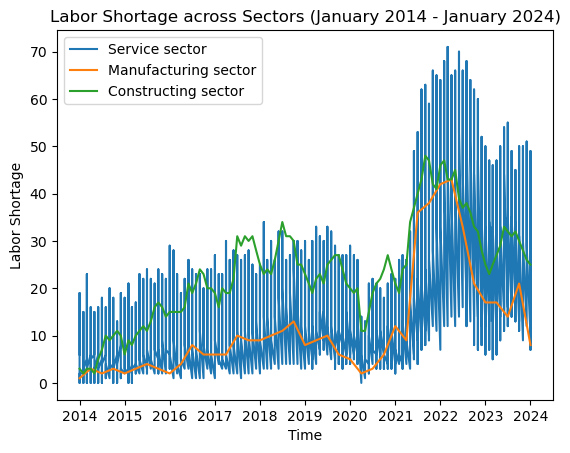

In [45]:
data = {'Time': ['2014M01', '2014M02', '2014M03']}
df = pd.DataFrame(data)

df[['Year', 'Month']] = df['Time'].str.extract(r'(\d{4})M(\d{2})')

df['Time'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

df.drop(['Year', 'Month'], axis=1, inplace=True)

lab_short_service['Time'] = pd.to_datetime(lab_short_service['Time'], format='%YM%m')
lab_short_manu['Time'] = pd.to_datetime(lab_short_manu['Time'], format='%Y-%m-%d')
lab_short_cons['Time'] = pd.to_datetime(lab_short_cons['Time'], format='%Y-%m-%d')

plt.plot(lab_short_service['Time'], lab_short_service['Labor Shortage'], label='Service sector')
plt.plot(lab_short_manu['Time'], lab_short_manu['Labor Shortage'], label='Manufacturing sector')
plt.plot(lab_short_cons['Time'], lab_short_cons['Labor Shortage'], label='Construction sector')

plt.xlabel('Time')
plt.ylabel('Labor Shortage')
plt.title('Labor Shortage across Sectors (January 2014 - January 2024)')
plt.legend()

plt.show()


**Interactive plot** :

Her skal vi have udviklingen i antal internationale medarbejdere i hver af servicebrancherne med drop-down

In [ ]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


Explain what you see when moving elements of the interactive plot around. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.